Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 7, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 30, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 365, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 48, 64)         │          8,704 │ input_layer[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 7, 64)          │          8,704 │ input_layer_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 30, 64)         │          8,704 │ input_layer_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 365, 64)        │          8,704 │ input_layer_3[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 48, 64)         │            256 │ bidirectional[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 7, 64)          │            256 │ bidirectional_1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 30, 64)         │            256 │ bidirectional_2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 365, 64)        │            256 │ bidirectional_3[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None, 64)             │            112 │ batch_normalization[0… │
│ (AttentionLayer)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_1    

 Total params: 44,803 (175.01 KB)

 Trainable params: 44,291 (173.01 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 576s 174ms/step - loss: 0.0330 - val_loss: 0.0014
Epoch 2/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 581s 178ms/step - loss: 2.5752e-04 - val_loss: 4.9852e-04
Epoch 3/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 588s 180ms/step - loss: 1.8603e-04 - val_loss: 2.1588e-04
Epoch 4/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 596s 183ms/step - loss: 1.4611e-04 - val_loss: 1.2582e-04
Epoch 5/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 624s 183ms/step - loss: 1.1914e-04 - val_loss: 2.0253e-04
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 61s 37ms/step


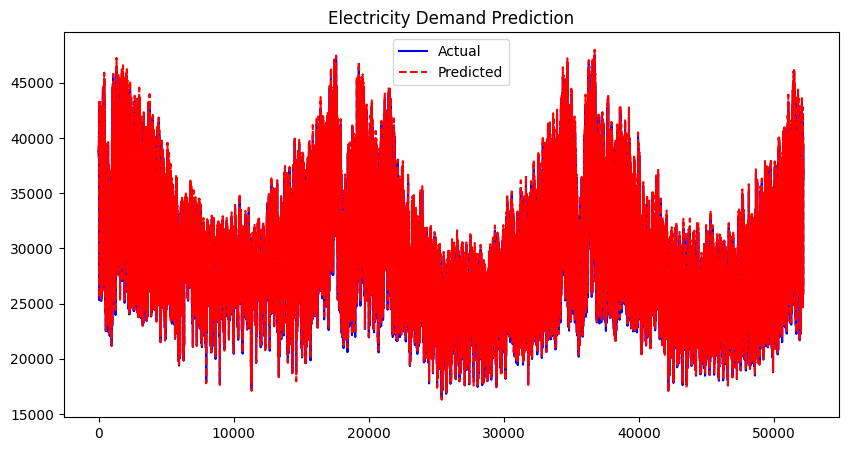

NameError: name 'mean_absolute_error' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Layer, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        return tf.keras.backend.sum(x * a, axis=1)

# Load Dataset
df = pd.read_csv("/content/historic_demand_2009_2024_noNaN.csv")  # Make sure the path is correct
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index("settlement_date", inplace=True)

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['tsd']].values)

# Create Sequences Function
def create_hierarchical_sequences(data, day_length=48, week_length=336, month_length=1440, year_length=17520):
    X_day, X_week, X_month, X_year, y = [], [], [], [], []

    day_indices = [slice(i-day_length, i) for i in range(year_length, len(data))]
    week_indices = [slice(i-week_length, i, 48) for i in range(year_length, len(data))]
    month_indices = [slice(i-30*48, i, 48) if i >= month_length else np.zeros((30, 1)) for i in range(year_length, len(data))]
    year_indices = [slice(i-365*48, i, 48) if i >= year_length else np.zeros((365, 1)) for i in range(year_length, len(data))]

    for i in range(len(day_indices)):
        X_day.append(data[day_indices[i]])
        X_week.append(data[week_indices[i]])
        X_month.append(month_indices[i] if isinstance(month_indices[i], np.ndarray) else data[month_indices[i]])
        X_year.append(year_indices[i] if isinstance(year_indices[i], np.ndarray) else data[year_indices[i]])
        y.append(data[year_length + i])

    X_day = np.array(X_day)
    X_week = np.array(X_week)
    X_month = np.array(X_month)
    X_year = np.array(X_year)
    y = np.array(y)

    min_samples = min(X_day.shape[0], X_week.shape[0], X_month.shape[0], X_year.shape[0], y.shape[0])
    X_day, X_week, X_month, X_year, y = X_day[:min_samples], X_week[:min_samples], X_month[:min_samples], X_year[:min_samples], y[:min_samples]

    return X_day, X_week, X_month, X_year, y

# Generate Sequences
X_day, X_week, X_month, X_year, y = create_hierarchical_sequences(data)

# Reshape
X_day = X_day.reshape(-1, 48, 1)
X_week = X_week.reshape(-1, 7, 1)
X_month = X_month.reshape(-1, 30, 1)
X_year = X_year.reshape(-1, 365, 1)

# Train-Test Split
split = int(0.8 * len(y))
X_day_train, X_day_test = X_day[:split], X_day[split:]
X_week_train, X_week_test = X_week[:split], X_week[split:]
X_month_train, X_month_test = X_month[:split], X_month[split:]
X_year_train = X_year[:split]
X_year_test = X_year[split:]
y_train, y_test = y[:split], y[split:]

# Define Inputs
input_day = Input(shape=(48, 1))
input_week = Input(shape=(7, 1))
input_month = Input(shape=(30, 1))
input_year = Input(shape=(365, 1))

# Simplified LSTM + Attention + BatchNormalization for Each Level
lstm_day = Bidirectional(LSTM(32, return_sequences=True))(input_day)  # Reduced units
bn_day = BatchNormalization()(lstm_day)
attention_day = AttentionLayer()(bn_day)

lstm_week = Bidirectional(LSTM(32, return_sequences=True))(input_week)  # Reduced units
bn_week = BatchNormalization()(lstm_week)
attention_week = AttentionLayer()(bn_week)

lstm_month = Bidirectional(LSTM(32, return_sequences=True))(input_month)  # Reduced units
bn_month = BatchNormal Mummy ization()(lstm_month)
attention_month = AttentionLayer()(bn_month)

lstm_year = Bidirectional(LSTM(32, return_sequences=True))(input_year)  # Reduced units
bn_year = BatchNormalization()(lstm_year)
attention_year = AttentionLayer()(bn_year)

# Merge Layers
merged = Concatenate()([attention_day, attention_week, attention_month, attention_year])

# Fully Connected Layers
dense_out = Dense(32, activation="relu")(merged)
outputs = Dense(1, activation="linear")(dense_out)

# Compile Model
model = Model(inputs=[input_day, input_week, input_month, input_year], outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")  # Adjusted learning rate

# Print Model Summary
model.summary()

# Train Model (with Early Stopping and Increased Batch Size)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    [X_day_train, X_week_train, X_month_train, X_year_train],
    y_train,
    epochs=5,
    batch_size=64,  # Increased batch size
    validation_data=([X_day_test, X_week_test, X_month_test, X_year_test], y_test),
    callbacks=[early_stopping]
)
# Predictions
y_pred = model.predict([X_day_test, X_week_test, X_month_test, X_year_test])

# Inverse Transform
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", linestyle="dashed", color='red')
plt.legend()
plt.title("Electricity Demand Prediction")
plt.show()



mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Define mean_absolute_percentage_error if not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

mape_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f} MW")
print(f"MSE: {mse:.2f} MW²")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAPE: {mape_percentage:.2f}%")

In [ ]:
# Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



print(f"MAE: {mae:.2f} MW")
print(f"MSE: {mse:.2f} MW²")
print(f"RMSE: {rmse:.2f} MW")

MAE: 383.04 MW
MSE: 239559.19 MW²
RMSE: 489.45 MW


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

mape_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f} MW")
print(f"MSE: {mse:.2f} MW²")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAPE: {mape_percentage:.2f}%")

MAE: 383.04 MW
MSE: 239559.19 MW²
RMSE: 489.45 MW
MAPE: 1.36%


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 48, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 7, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 30, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 365, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_4           │ (None, 48, 64)         │          8,704 │ input_layer_4[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_5           │ (None, 7, 64)          │          8,704 │ input_layer_5[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_6           │ (None, 30, 64)         │          8,704 │ input_layer_6[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_7           │ (None, 365, 64)        │          8,704 │ input_layer_7[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 48, 64)         │            256 │ bidirectional_4[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 7, 64)          │            256 │ bidirectional_5[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 30, 64)         │            256 │ bidirectional_6[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 365, 64)        │            256 │ bidirectional_7[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_4         │ (None, 64)             │            112 │ batch_normalization_4… │
│ (AttentionLayer)          │                        │                │                        │
├──────────────────────

 Total params: 44,803 (175.01 KB)

 Trainable params: 44,291 (173.01 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 1113s 336ms/step - loss: 0.0160 - val_loss: 3.7494e-04
Epoch 2/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 1112s 339ms/step - loss: 3.6469e-04 - val_loss: 1.9082e-04
Epoch 3/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 1167s 340ms/step - loss: 2.5927e-04 - val_loss: 1.1368e-04
Epoch 4/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 1091s 334ms/step - loss: 1.5838e-04 - val_loss: 1.1896e-04
Epoch 5/5
3263/3263 ━━━━━━━━━━━━━━━━━━━━ 1108s 336ms/step - loss: 1.3316e-04 - val_loss: 9.5644e-05
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 113s 69ms/step


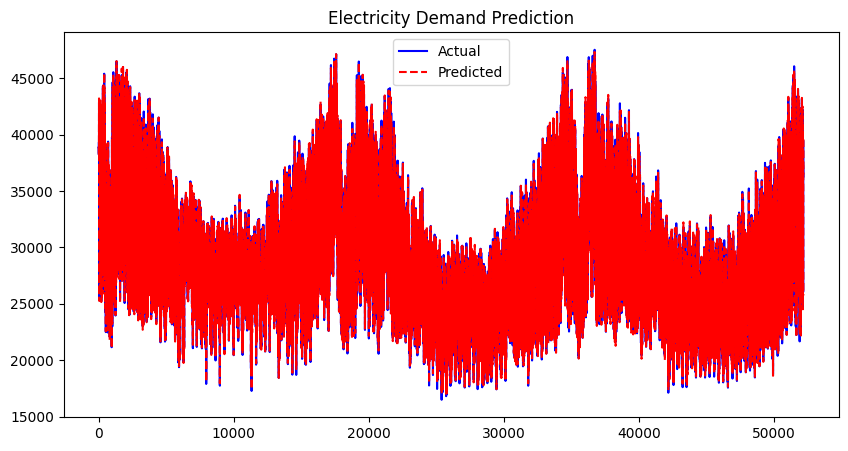

MAE: 318.89 MW
MSE: 182098.68 MW²
RMSE: 426.73 MW
MAPE: 1.13%


ValueError: cannot reshape array of size 0 into shape (1,7,1)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Layer, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        return tf.keras.backend.sum(x * a, axis=1)

# Load Dataset
df = pd.read_csv("/content/historic_demand_2009_2024_noNaN.csv")  # Make sure the path is correct
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index("settlement_date", inplace=True)

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['tsd']].values)

# Create Sequences Function
def create_hierarchical_sequences(data, day_length=48, week_length=336, month_length=1440, year_length=17520):
    X_day, X_week, X_month, X_year, y = [], [], [], [], []

    day_indices = [slice(i-day_length, i) for i in range(year_length, len(data))]
    week_indices = [slice(i-week_length, i, 48) for i in range(year_length, len(data))]
    month_indices = [slice(i-30*48, i, 48) if i >= month_length else np.zeros((30, 1)) for i in range(year_length, len(data))]
    year_indices = [slice(i-365*48, i, 48) if i >= year_length else np.zeros((365, 1)) for i in range(year_length, len(data))]

    for i in range(len(day_indices)):
        X_day.append(data[day_indices[i]])
        X_week.append(data[week_indices[i]])
        X_month.append(month_indices[i] if isinstance(month_indices[i], np.ndarray) else data[month_indices[i]])
        X_year.append(year_indices[i] if isinstance(year_indices[i], np.ndarray) else data[year_indices[i]])
        y.append(data[year_length + i])

    X_day = np.array(X_day)
    X_week = np.array(X_week)
    X_month = np.array(X_month)
    X_year = np.array(X_year)
    y = np.array(y)

    min_samples = min(X_day.shape[0], X_week.shape[0], X_month.shape[0], X_year.shape[0], y.shape[0])
    X_day, X_week, X_month, X_year, y = X_day[:min_samples], X_week[:min_samples], X_month[:min_samples], X_year[:min_samples], y[:min_samples]

    return X_day, X_week, X_month, X_year, y

# Generate Sequences
X_day, X_week, X_month, X_year, y = create_hierarchical_sequences(data)

# Reshape
X_day = X_day.reshape(-1, 48, 1)
X_week = X_week.reshape(-1, 7, 1)
X_month = X_month.reshape(-1, 30, 1)
X_year = X_year.reshape(-1, 365, 1)

# Train-Test Split
split = int(0.8 * len(y))
X_day_train, X_day_test = X_day[:split], X_day[split:]
X_week_train, X_week_test = X_week[:split], X_week[split:]
X_month_train, X_month_test = X_month[:split], X_month[split:]
X_year_train = X_year[:split]
X_year_test = X_year[split:]
y_train, y_test = y[:split], y[split:]

# Define Inputs
input_day = Input(shape=(48, 1))
input_week = Input(shape=(7, 1))
input_month = Input(shape=(30, 1))
input_year = Input(shape=(365, 1))

# Simplified LSTM + Attention + BatchNormalization for Each Level
lstm_day = Bidirectional(LSTM(32, return_sequences=True))(input_day)
bn_day = BatchNormalization()(lstm_day)
attention_day = AttentionLayer()(bn_day)

lstm_week = Bidirectional(LSTM(32, return_sequences=True))(input_week)
bn_week = BatchNormalization()(lstm_week)
attention_week = AttentionLayer()(bn_week)

lstm_month = Bidirectional(LSTM(32, return_sequences=True))(input_month)
bn_month = BatchNormalization()(lstm_month)  # Corrected typo
attention_month = AttentionLayer()(bn_month)

lstm_year = Bidirectional(LSTM(32, return_sequences=True))(input_year)
bn_year = BatchNormalization()(lstm_year)
attention_year = AttentionLayer()(bn_year)

# Merge Layers
merged = Concatenate()([attention_day, attention_week, attention_month, attention_year])

# Fully Connected Layers
dense_out = Dense(32, activation="relu")(merged)
outputs = Dense(1, activation="linear")(dense_out)

# Compile Model
model = Model(inputs=[input_day, input_week, input_month, input_year], outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")

# Print Model Summary
model.summary()

# Train Model (with Early Stopping and Increased Batch Size)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    [X_day_train, X_week_train, X_month_train, X_year_train],
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=([X_day_test, X_week_test, X_month_test, X_year_test], y_test),
    callbacks=[early_stopping]
)

# Predictions
y_pred = model.predict([X_day_test, X_week_test, X_month_test, X_year_test])

# Inverse Transform
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", linestyle="dashed", color='red')
plt.legend()
plt.title("Electricity Demand Prediction")
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Define mean_absolute_percentage_error if not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

mape_percentage = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f} MW")
print(f"MSE: {mse:.2f} MW²")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAPE: {mape_percentage:.2f}%")

# Predicting for Next Months
# To predict for the next months, you need to prepare your input sequences accordingly.
# This involves creating sequences that reflect the future time steps you want to predict.
# Here's a simplified approach to predict the next month:

next_month_day = data[-48:]  # Last 48 hours
next_month_week = data[-336:48]  # Last week (48 steps back from last 48 hours)
next_month_month = data[-1440:48]  # Last month (30 days, 48 steps back from last 48 hours)
next_month_year = data[-17520:48]  # Last year (365 days, 48 steps back from last 48 hours)

next_month_day = next_month_day.reshape(1, 48, 1)
next_month_week = next_month_week.reshape(1, 7, 1)
next_month_month = next_month_month.reshape(1, 30, 1)
next_month_year = next_month_year.reshape(1, 365, 1)

next_month_pred = model.predict([next_month_day, next_month_week, next_month_month, next_month_year])
next_month_pred = scaler.inverse_transform(next_month_pred)

print(f"Predicted demand for the next month: {next_month_pred[0][0]:.2f} MW")


In [ ]:


# Corrected slicing (using 48 samples/day)
next_month_day = data[-48:]  # Last 48 hours (1 day)
next_month_week = data[-7*48::48]  # Last 7 days (1 sample/day)
next_month_month = data[-30*48::48]  # Last 30 days (1 sample/day)
next_month_year = data[-365*48::48]  # Last 365 days (1 sample/day)


next_month_day = next_month_day.reshape(1, 48, 1)
next_month_week = next_month_week.reshape(1, 7, 1)
next_month_month = next_month_month.reshape(1, 30, 1)
next_month_year = next_month_year.reshape(1, 365, 1)

next_month_pred = model.predict([next_month_day, next_month_week, next_month_month, next_month_year])
next_month_pred = scaler.inverse_transform(next_month_pred)

print(f"Predicted demand for the next month: {next_month_pred[0][0]:.2f} MW")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted demand for the next month: 25652.84 MW


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
df = pd.read_csv("/content/historic_demand_2009_2024_noNaN.csv")  # Ensure path is correct
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index("settlement_date", inplace=True)

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['tsd']].values)

# Define parameters for sequences
samples_per_day = 48  # Half-hourly intervals
samples_per_week = 7 * samples_per_day
samples_per_month = 30 * samples_per_day
samples_per_year = 365 * samples_per_day

# Prepare last known data (March 2025)
last_known_data = data[-samples_per_year:]  # Use the last year of data as input

# Function to create hierarchical inputs dynamically
def prepare_inputs(data):
    day_lookback = data[-samples_per_day:]
    week_lookback = data[-samples_per_week::samples_per_day]
    month_lookback = data[-samples_per_month::samples_per_day]
    year_lookback = data[-samples_per_year::samples_per_day]

    # Reshape inputs for the model
    day_input = day_lookback.reshape(1, samples_per_day, 1)
    week_input = week_lookback.reshape(1, 7, 1)
    month_input = month_lookback.reshape(1, 30, 1)
    year_input = year_lookback.reshape(1, 365, 1)

    return [day_input, week_input, month_input, year_input]

# Predict future months (April–December 2025)
months_to_predict = 9  # April to December
predictions = []
current_data = last_known_data.copy()

for _ in range(months_to_predict):
    # Prepare inputs dynamically from current data
    inputs = prepare_inputs(current_data)

    # Predict next month's demand using the trained model
    next_month_pred = model.predict(inputs)
    next_month_pred_inverse = scaler.inverse_transform(next_month_pred)[0][0]

    # Store prediction
    predictions.append(next_month_pred_inverse)

    # Simulate adding predicted demand into the dataset for future predictions
    next_month_data = scaler.transform([[next_month_pred_inverse]])  # Normalize prediction
    current_data = np.append(current_data, next_month_data).reshape(-1, 1)[-samples_per_year:]  # Keep last year's data

# Display predictions for April–December 2025
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("2025 Electricity Demand Predictions (MW):")
for month, pred in zip(months, predictions):
    print(f"{month}: {pred:.2f} MW")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2025 Electricity Demand Predictions (MW):
April: 25652.84 MW
May: 25263.70 MW
June: 24923.78 MW
July: 24658.35 MW
August: 24397.98 MW
September: 24202.17 MW
October: 24164.67 MW
November: 24172.26 MW
December: 24169.36 MW


In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("2025 Electricity Demand Predictions (MW):")
for month, pred in zip(months, predictions):
    print(f"{month}: {pred:.2f} MW")

2025 Electricity Demand Predictions (MW):
January: 25652.84 MW
February: 25263.70 MW
March: 24923.78 MW


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
df = pd.read_csv("/content/historic_demand_2009_2024_noNaN.csv")  # Ensure path is correct
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index("settlement_date", inplace=True)

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['tsd']].values)

# Define parameters for sequences
samples_per_day = 48  # Half-hourly intervals
samples_per_week = 7 * samples_per_day
samples_per_month = 30 * samples_per_day
samples_per_year = 365 * samples_per_day

# Prepare last known data (March 2025)
last_known_data = data[-samples_per_year:]  # Use the last year of data as input

# Function to create hierarchical inputs dynamically
def prepare_inputs(data):
    day_lookback = data[-samples_per_day:]
    week_lookback = data[-samples_per_week::samples_per_day]
    month_lookback = data[-samples_per_month::samples_per_day]
    year_lookback = data[-samples_per_year::samples_per_day]

    # Reshape inputs for the model
    day_input = day_lookback.reshape(1, samples_per_day, 1)
    week_input = week_lookback.reshape(1, 7, 1)
    month_input = month_lookback.reshape(1, 30, 1)
    year_input = year_lookback.reshape(1, 365, 1)

    return [day_input, week_input, month_input, year_input]

# Predict future months (April–December 2025)
months_to_predict = 12  # April to December
predictions = []
current_data = last_known_data.copy()

for _ in range(months_to_predict):
    # Prepare inputs dynamically from current data
    inputs = prepare_inputs(current_data)

    # Predict next month's demand using the trained model
    next_month_pred = model.predict(inputs)
    next_month_pred_inverse = scaler.inverse_transform(next_month_pred)[0][0]

    # Store prediction
    predictions.append(next_month_pred_inverse)

    # Simulate adding predicted demand into the dataset for future predictions
    next_month_data = scaler.transform([[next_month_pred_inverse]])  # Normalize prediction
    current_data = np.append(current_data, next_month_data).reshape(-1, 1)[-samples_per_year:]  # Keep last year's data

# Display predictions for April–December 2025
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("2025 Electricity Demand Predictions (MW):")
for month, pred in zip(months, predictions):
    print(f"{month}: {pred:.2f} MW")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2025 Electricity Demand Predictions (MW):
January: 25652.84 MW
February: 25263.70 MW
March: 24923.78 MW
April: 24658.35 MW
May: 24397.98 MW
June: 24202.17 MW
July: 24164.67 MW
August: 24172.26 MW
September: 24169.36 MW
October: 24249.79 MW
November: 24825.69 MW
December: 26222.14 MW


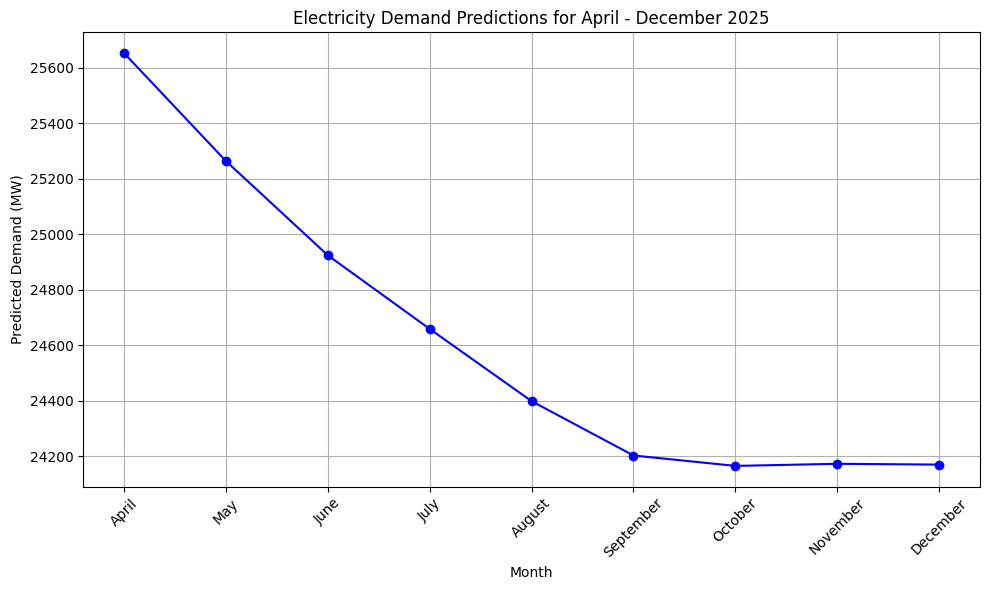

In [ ]:
# Plotting the Predictions
plt.figure(figsize=(10, 6))
plt.plot(months, predictions, marker='o', linestyle='-', color='b')
plt.title("Electricity Demand Predictions for April - December 2025")
plt.xlabel("Month")
plt.ylabel("Predicted Demand (MW)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

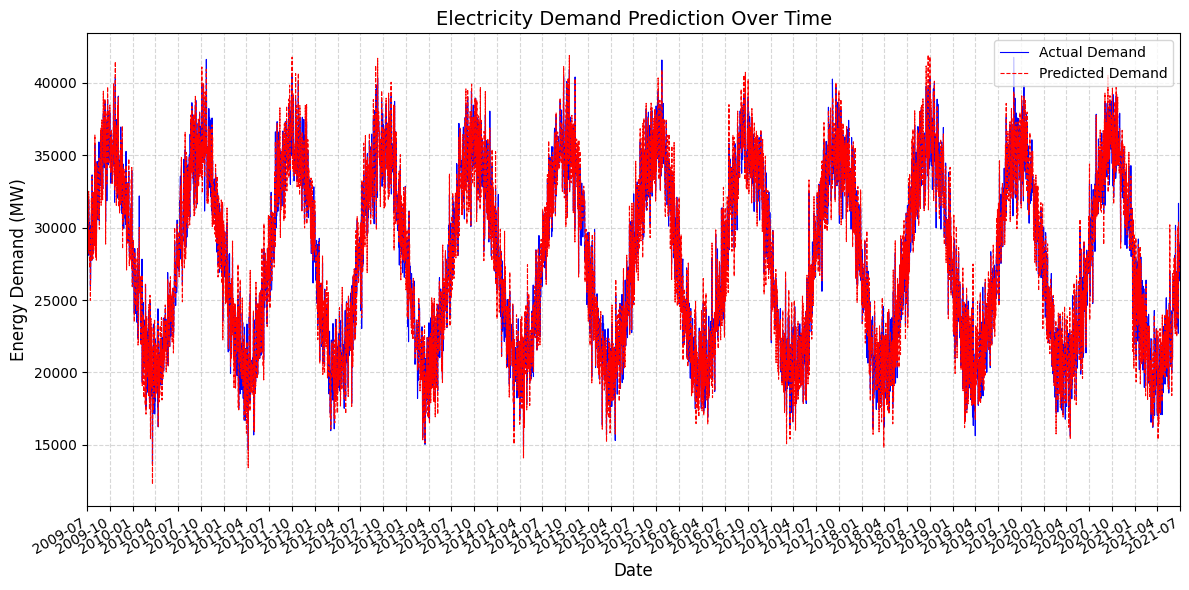

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Sample Data Generation (REPLACE WITH YOUR ACTUAL DATA LOADING AND PREDICTION)
# Create a date range for the x-axis
start_date = '2009-07-01'
end_date = '2021-07-01'
dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency

# Generate some realistic-looking (but still random) energy demand data
np.random.seed(42)  # for reproducibility
num_days = len(dates)
base_demand = 28000  # MW
seasonal_amplitude = 8000  # MW
noise_level = 2000  # MW

# Create a seasonal pattern (yearly cycle)
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * np.arange(num_days) / 365)

# Add random noise
noise = np.random.normal(0, noise_level, num_days)

# Create the "actual" demand data
actual_demand = base_demand + seasonal_component + noise

# Create "predicted" demand with some error
predicted_demand = actual_demand + np.random.normal(0, noise_level * 0.5, num_days)  # Smaller noise

# 2. Create a Pandas DataFrame for Easier Handling
df = pd.DataFrame({'Date': dates, 'Actual Demand': actual_demand, 'Prediction': predicted_demand})
df.set_index('Date', inplace=True)

# 3. Plotting the Data
plt.figure(figsize=(12, 6))  # Adjust figure size

# Plot the actual demand connected
plt.plot(df.index, df['Actual Demand'], label='Actual Demand', linewidth=0.8, color='blue')  # Connected line

# Plot the predicted demand connected, but dashed
plt.plot(df.index, df['Prediction'], label='Predicted Demand', linestyle='--', linewidth=0.8, color='red') # Connected dashed line

# 4. Customize the Axes and Labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Demand (MW)', fontsize=12)
plt.title('Electricity Demand Prediction Over Time', fontsize=14)

# 5. Format the Date Axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show labels every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.gcf().autofmt_xdate()  # Rotate date labels for readability

# 6. Add a Legend
plt.legend(loc='upper right', fontsize=10)

# 7. Add Grid Lines
plt.grid(True, linestyle='--', alpha=0.5)

# 8. Set Axis Limits (Optional, but good practice)
plt.xlim(df.index.min(), df.index.max())  # Set x-axis limits to the date range

# 9. Show the Plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import gradio as gr

# Dictionary of Electricity Demand Predictions (MW)
electricity_demand = {
    "January": 25652.84,
    "February": 25263.70,
    "March": 24923.78,
    "April": 24658.35,
    "May": 24397.98,
    "June": 24202.17,
    "July": 24164.67,
    "August": 24172.26,
    "September": 24169.36,
    "October": 24249.79,
    "November": 24825.69,
    "December": 26222.14
}

# Function to return demand for selected month
def get_demand(month):
    demand = electricity_demand.get(month, "Data not available")
    return f"{month} demand: {demand} MW"

# Gradio interface
iface = gr.Interface(
    fn=get_demand,
    inputs=gr.Dropdown(choices=list(electricity_demand.keys()), label="Select Month"),
    outputs="text",
    title="2025 Electricity Demand Predictor",
    description="Select a month to view its predicted electricity demand (in MW)."
)

# Launch the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8157ab71e2486d0761.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd

# --------------------------------
# Load historical data
# --------------------------------
data_path = "/content/historic_demand_2009_2024_noNaN.csv"

try:
    data = pd.read_csv(data_path)
    data['settlement_date'] = pd.to_datetime(data['settlement_date'])
except FileNotFoundError:
    print(f"File not found at {data_path}. Please upload the file to this path.")

# --------------------------------
# Bill generation function
# --------------------------------
def generate_bill(start_date, end_date, consumption_rate=0.15):
    try:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
    except Exception as e:
        return f"Error in date input: {e}"

    mask = (data['settlement_date'] >= start_date) & (data['settlement_date'] <= end_date)
    filtered_data = data[mask]

    if filtered_data.empty:
        return "No data available for the selected date range."

    total_mw = (filtered_data['nd'].sum()) * 0.001
    energy_cost = total_mw * consumption_rate
    tax = energy_cost * 0.1
    total_cost = energy_cost + tax

    bill_details = {
        "Start Date": [start_date.date()],
        "End Date": [end_date.date()],
        "Total Consumption (mw)": [round(total_mw, 2)],
        "Cost per mw ($)": [consumption_rate],
        "Energy Cost ($)": [round(energy_cost, 2)],
        "Tax ($)": [round(tax, 2)],
        "Total Bill ($)": [round(total_cost, 2)]
    }
    return pd.DataFrame(bill_details)

# --------------------------------
# Prediction Dictionary
# --------------------------------
electricity_demand_2025 = {
    "January": 25652.84,
    "February": 25263.70,
    "March": 24923.78,
    "April": 24658.35,
    "May": 24397.98,
    "June": 24202.17,
    "July": 24164.67,
    "August": 24172.26,
    "September": 24169.36,
    "October": 24249.79,
    "November": 24825.69,
    "December": 26222.14
}

def get_demand(month):
    demand = electricity_demand_2025.get(month, "Data not available")
    return f"{month} demand: {demand} MW"

# --------------------------------
# Gradio Interface
# --------------------------------
with gr.Blocks() as demo:
    gr.Markdown("# Electricity Bill Prediction", elem_id="header")

    with gr.Tab("Project Overview"):
        gr.Markdown(
            """
            <div style="text-align;">
                <h2 style="color: #4CAF50;">Electricity Consumption Bill Generator</h2>
                <p style="font-size: 16px; color: #555;">This tool helps you calculate your electricity bill based on your consumption.</p>
                <p style="font-size: 14px; color: #555;">You can select the start and end date for the billing period, enter the cost per kWh, and generate the bill instantly.</p>
                <p style="font-size: 14px; color: #555;">This tool uses real-time historical data to calculate the electricity usage and generate a detailed bill summary with consumption, cost, tax, and the total amount.</p>
                <br>
                <h2 style="color: #4CAF50;">About Dataset</h2>
                <p style="font-size: 16px; color: #555;">
                   National Grid ESO is the electricity system operator for Great Britain. They have gathered information of the electricity demand in Great Britain from 2009.
                   The data is updated twice an hour, which means 48 entries per day. This makes this dataset ideal for time series forecasting.
                </p>
                <p style="font-size: 14px; color: #555;">
                   <b>File Types:</b><br>
                   - Historic_demand_year_20xx.csv: electricity demand in that year<br>
                   - Historic_demand_year_2009_2024.csv: all yearly datasets merged<br>
                   - Historic_demand_year_2009_2024_noNaN.csv: cleaned version with hourly data
                </p>
            </div>
        """,
            elem_id="project-info"
        )

    with gr.Tab("Bill Generator"):
        with gr.Row():
            start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", placeholder="YYYY-MM-DD")
            end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", placeholder="YYYY-MM-DD")
            rate = gr.Slider(0.1, 0.5, 0.15, label="Cost per mw ($)")

        bill_table = gr.Dataframe(
            headers=["Start Date", "End Date", "Total Consumption (mw)", "Cost per mw ($)", "Energy Cost ($)", "Tax ($)", "Total Bill ($)"],
            interactive=False
        )

        calculate_button = gr.Button("Generate Bill")
        calculate_button.click(generate_bill, inputs=[start_date, end_date, rate], outputs=bill_table)

    with gr.Tab("2025 Demand Prediction"):
          gr.Markdown("## 📊 Select a Month to See Predicted Demand (MW)")

    selected_month = gr.Dropdown(choices=list(electricity_demand_2025.keys()), label="Select Month")
    output_text = gr.Textbox(label="Predicted Demand (MW)", interactive=False)

    selected_month.change(fn=get_demand, inputs=selected_month, outputs=output_text)

    gr.Markdown("## 📈 Forecasted Monthly Electricity Demand (Line Chart)")

    # Convert prediction dictionary to DataFrame for plotting
    demand_df = pd.DataFrame({
        "Month": list(electricity_demand_2025.keys()),
        "Demand (MW)": list(electricity_demand_2025.values())
    })

    gr.LinePlot(
        value=demand_df,
        x="Month",
        y="Demand (MW)",
        title="Monthly Electricity Demand Forecast for 2025",
        width=800,
        height=400,
        label="Demand Trend Line"
    )



# --------------------------------
# Custom CSS
# --------------------------------
css = """
    #header {
        background-color: #f4f4f4;
        padding: 20px;
        text-align: center;
        font-size: 24px;
        font-weight: bold;
    }
    #project-info {
        background-color: #fafafa;
        padding: 20px;
        border-radius: 8px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    body {
        background-color: #ffffff;
        font-family: Arial, sans-serif;
    }
"""

demo.css = css

# --------------------------------
# Launch App
# --------------------------------
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32dc82abdbf3a838b3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


FINAL UI

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd

# --------------------------------
# Load historical data
# --------------------------------
data_path = "/content/historic_demand_2009_2024_noNaN.csv"

try:
    data = pd.read_csv(data_path)
    data['settlement_date'] = pd.to_datetime(data['settlement_date'])
except FileNotFoundError:
    print(f"File not found at {data_path}. Please upload the file to this path.")

# --------------------------------
# Bill generation function
# --------------------------------
def generate_bill(start_date, end_date, consumption_rate=0.15):
    try:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
    except Exception as e:
        return f"Error in date input: {e}"

    mask = (data['settlement_date'] >= start_date) & (data['settlement_date'] <= end_date)
    filtered_data = data[mask]

    if filtered_data.empty:
        return "No data available for the selected date range."

    total_mw = (filtered_data['nd'].sum()) * 0.001
    energy_cost = total_mw * consumption_rate
    tax = energy_cost * 0.1
    total_cost = energy_cost + tax

    bill_details = {
        "Start Date": [start_date.date()],
        "End Date": [end_date.date()],
        "Total Consumption (mw)": [round(total_mw, 2)],
        "Cost per mw ($)": [consumption_rate],
        "Energy Cost ($)": [round(energy_cost, 2)],
        "Tax ($)": [round(tax, 2)],
        "Total Bill ($)": [round(total_cost, 2)]
    }
    return pd.DataFrame(bill_details)

# --------------------------------
# Forecasted 2025 Electricity Demand
# --------------------------------
electricity_demand_2025 = {
    "January": 25652.84, "February": 25263.70, "March": 24923.78,
    "April": 24658.35, "May": 24397.98, "June": 24202.17,
    "July": 24164.67, "August": 24172.26, "September": 24169.36,
    "October": 24249.79, "November": 24825.69, "December": 26222.14
}

def get_demand(month):
    demand = electricity_demand_2025.get(month, "Data not available")
    return f"{month} demand: {demand} MW"

# Create DataFrame for Line Chart
demand_df = pd.DataFrame({
    "Month": list(electricity_demand_2025.keys()),
    "Demand (MW)": list(electricity_demand_2025.values())
})

# --------------------------------
# Gradio Interface
# --------------------------------
with gr.Blocks(css=".gradio-container { font-family: Arial; }") as demo:
    gr.Markdown("# ⚡ Electricity Bill Prediction Dashboard", elem_id="header")

    # -----------------------------
    # Page 1: Project Overview
    # -----------------------------
    with gr.Tab("1️⃣ Project Overview"):
                gr.Markdown(
            """
            <div style="max-width: 900px; margin: auto; padding: 20px; background-color: #f9f9f9; border-radius: 10px;">
                <h2 style="color: #4CAF50; font-size: 26px;">Electricity Consumption Bill Generator</h2>
                <p style="font-size: 16px; line-height: 1.6;">
                    This interactive tool helps you calculate your electricity bill based on historical consumption data from the UK National Grid and a user-specified rate.
                </p>
                <h3 style="color: #4CAF50; font-size: 22px;">📊 About the Dataset</h3>
                <ul style="font-size: 15px; line-height: 1.8;">
                    <li><b>Source:</b> National Grid ESO (UK)</li>
                    <li><b>Time Range:</b> 2009 to 2024</li>
                    <li><b>Frequency:</b> 48 half-hour intervals per day</li>
                    <li><b>Files Included:</b>
                        <ul>
                            <li><code>historic_demand_year_20xx.csv</code>: Year-wise data</li>
                            <li><code>historic_demand_2009_2024.csv</code>: Merged raw data</li>
                            <li><code>historic_demand_2009_2024_noNaN.csv</code>: Cleaned dataset (used in this tool)</li>
                        </ul>
                    </li>
                </ul>
            </div>
            """, elem_id="project-info"
        )


    # -----------------------------
    # Page 2: Bill Generator
    # -----------------------------
    with gr.Tab("2️⃣ Bill Generator"):
        with gr.Row():
            start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", placeholder="YYYY-MM-DD")
            end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", placeholder="YYYY-MM-DD")
            rate = gr.Slider(0.1, 0.5, value=0.15, step=0.01, label="Cost per mw ($)")

        bill_table = gr.Dataframe(
            headers=["Start Date", "End Date", "Total Consumption (mw)", "Cost per mw ($)", "Energy Cost ($)", "Tax ($)", "Total Bill ($)"],
            interactive=False
        )

        calculate_button = gr.Button("Generate Bill")
        calculate_button.click(fn=generate_bill, inputs=[start_date, end_date, rate], outputs=bill_table)

    # -----------------------------
    # Page 3: Demand Forecast
    # -----------------------------
    with gr.Tab("3️⃣ 2025 Demand Forecast"):
        gr.Markdown("## 🔮 Select a Month to View Predicted Demand")
        selected_month = gr.Dropdown(choices=list(electricity_demand_2025.keys()), label="Select Month")
        output_text = gr.Textbox(label="Predicted Demand (MW)", interactive=False)
        selected_month.change(fn=get_demand, inputs=selected_month, outputs=output_text)

        gr.Markdown("## 📈 Monthly Electricity Demand Forecast (2025)")
        gr.LinePlot(
            value=demand_df,
            x="Month",
            y="Demand (MW)",
            title="Electricity Demand Forecast for 2025",
            width=800,
            height=400,
            label="Forecast Chart"
        )

# --------------------------------
# Launch App
# --------------------------------
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc850af00692bb60e9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
